In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("NationalNames.csv")

In [5]:
data

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [6]:
#task 2
#Output the first 8 rows of the dataset
data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [7]:
#task 3
#Output the last 8 rows of the dataset
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [8]:
#task 4
#Get the names of dataset columns
data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [9]:
#task 5
#Get general information about data in the dataset
data.describe(include="all")

,Id,Name,Year,Gender,Count
count,1.825433e+06,1825433,1.825433e+06,1825433,1.825433e+06
unique,NaN,93889,NaN,2,NaN
top,NaN,Tommie,NaN,F,NaN
freq,NaN,270,NaN,1081683,NaN
mean,9.127170e+05,NaN,1.972620e+03,NaN,1.846879e+02
std,5.269573e+05,NaN,3.352891e+01,NaN,1.566711e+03
min,1.000000e+00,NaN,1.880000e+03,NaN,5.000000e+00
25%,4.563590e+05,NaN,1.949000e+03,NaN,7.000000e+00
50%,9.127170e+05,NaN,1.982000e+03,NaN,1.200000e+01
75%,1.369075e+06,NaN,2.001000e+03,NaN,3.200000e+01


In [52]:
#task 6
#Find the number of unique names in whole dataset
data["Name"].nunique()

93889

In [55]:
#task 7
#Calculate the number of unique female and male names in whole dataset
data.groupby("Gender")[["Name"]].nunique()

,Name
Gender,
F,64911
M,39199


In [155]:
#task 8
#Find 5 most popular male names in 2010
data[(data["Gender"]=="M") & (data["Year"]==2010)].sort_values("Count")[
    ["Name","Count"]].tail(5)

,Name,Count
1677396,William,17030
1677395,Jayden,17152
1677394,Michael,17308
1677393,Ethan,17985
1677392,Jacob,22082


In [34]:
#task 9
#Find the most popular name based on the results of one year 
#(the name for which Count is maximum)
name, year = data.sort_values("Count")[["Name","Year"]].tail(1).values[0,0:]
# values
print(f"The name {name} in {year} is the most popular name")

The name Linda in 1947 is the most popular name


In [22]:
#task 10
#Count the number of records with Count = minimum
data.groupby("Count").agg({"Id":"count"}).iloc[0,0]

254615

In [113]:
#task 11
#Count the number of unique names in each year
data.groupby("Year")[["Name"]].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


In [142]:
#task 12
#Find the year with the most number of unique names
data.groupby("Year")[["Name"]].nunique().sort_values("Name").tail(1)

,Name
Year,
2008,32488


In [153]:
#task 13
#Find the most popular name of the year with the most number of unique names
#(that is in 2008)
data[data["Year"]==2008].groupby("Name").sum().sort_values("Count").index[-1]

'Jacob'

In [157]:
#task 14
#Find the year when the name “Jacob” was the most popular as a female name
data[(data["Name"]=="Jacob")&(data["Gender"]=="F")].sort_values(
    "Count").tail(1)[["Year","Count"]]

,Year,Count
1455556,2004,171


In [135]:
#task 15
#Find year, with the most number of gender neutral names 
#(the same male and female names)
#data.groupby(["Name","Gender"]).sum().unstack().dropna().index.size
#data.groupby(["Year","Name"]).agg({"Count":sum}).unstack().dropna().index


Int64Index([], dtype='int64', name='Year')

In [24]:
#task 16
#Find total births per year
data.groupby("Year").sum()[["Count"]]

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


In [29]:
#task 17
#Find the year when the greatest number of children was born
data.groupby("Year")[["Count"]].sum().sort_values("Count").tail(1)

,Count
Year,
1957,4200026


In [31]:
#task 18
#Find the number of girls and boys that were born in each year
data.groupby(["Year","Gender"]).sum()["Count"].unstack()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [63]:
#task 19
#Count the number of years when more girls were born than boys
bandg = data.groupby(["Year","Gender"])["Count"].sum().unstack()
bandg[bandg["M"] < bandg["F"]].index.size

54

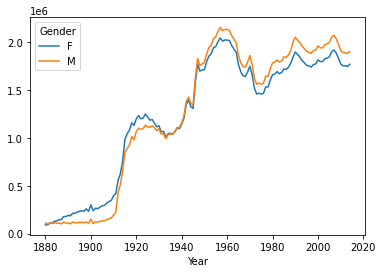

In [239]:
#task 20
#Draw the plot of total births per year of boys and girls
import matplotlib.pyplot as plt
bandg.plot()
plt.show()

In [85]:
#task 21
#Count number of gender neutral names (same for girls and boys)
data.groupby(["Name","Gender"]).sum().unstack().dropna().index.size

10221

In [249]:
#task 22
#Count how much times boys were named as Barbara
data[(data["Name"]=="Barbara")&(data["Gender"]=="M")]["Count"].sum()

4139

In [36]:
#task 24
#How many Vadims were born in 2000?
data[(data["Year"]>2000) & (data["Name"]=="Vadim")][["Count"]]

,Count
1384226,21
1413979,27
1445266,24
1477105,23
1509553,23
1542897,25
1577710,24
1612826,22
1648373,18
1681739,23


In [159]:
#task 23
#The most popular male names in the 21st century 
data[(data["Year"] > 2000) & (data["Gender"]=="M")].groupby(
    "Name").sum().sort_values("Count")[["Count"]].tail()

,Count
Name,
Matthew,261125
Joshua,268515
Ethan,270570
Michael,299252
Jacob,335404


In [104]:
data.sort_values("Count",ascending=False).groupby(["Year"])[["Name"]].first("Count")

,Name
Year,
1880,John
1881,John
1882,John
1883,John
1884,John
...,...
2010,Isabella
2011,Sophia
2012,Sophia
